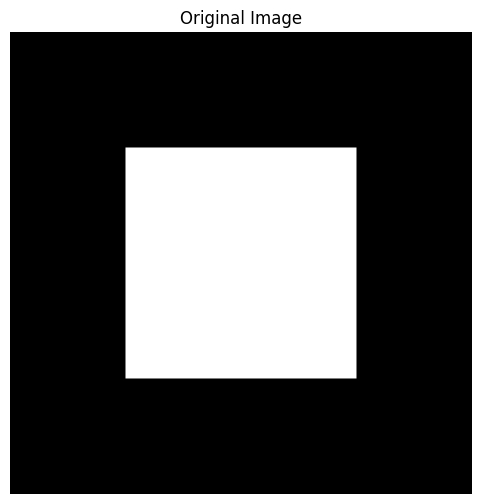

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

# Create a simple test image: a square wave
image_size = 256
image = np.zeros((image_size, image_size))
image[64:192, 64:192] = 1  # A square in the center

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

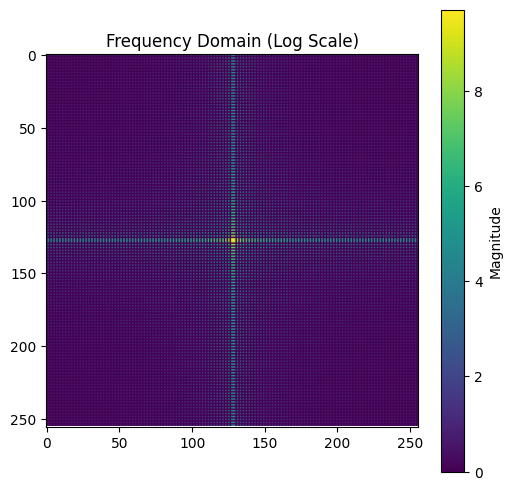

In [2]:
# Compute the 2D FFT
fft_image = fft2(image)
fft_shifted = fftshift(fft_image)

# Plot the frequency domain
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(fft_shifted) + 1), cmap='viridis')
plt.title('Frequency Domain (Log Scale)')
plt.colorbar(label='Magnitude')
plt.show()

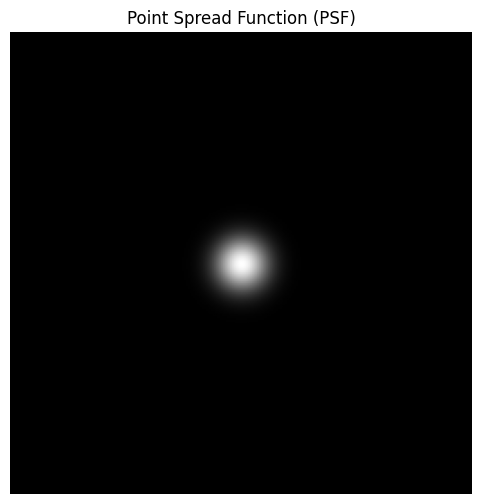

In [3]:
# Simulate a Gaussian PSF
def gaussian_psf(size, sigma):
    x, y = np.mgrid[-size//2:size//2, -size//2:size//2]
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))

psf = gaussian_psf(256, 10)
plt.figure(figsize=(6, 6))
plt.imshow(psf, cmap='gray')
plt.title('Point Spread Function (PSF)')
plt.axis('off')
plt.show()

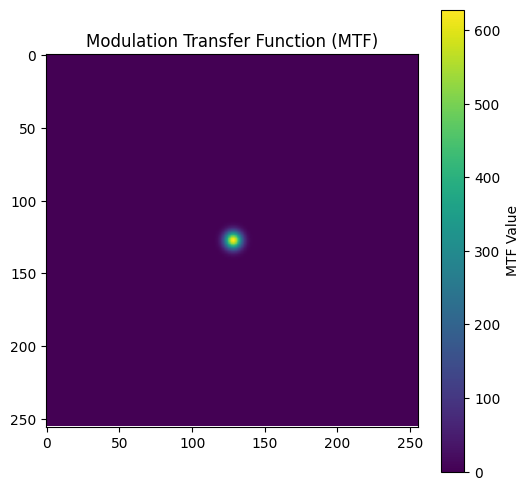

In [4]:
# Compute MTF as the magnitude of the FFT of PSF
mtf = np.abs(fftshift(fft2(psf)))

# Plot MTF
plt.figure(figsize=(6, 6))
plt.imshow(mtf, cmap='viridis')
plt.title('Modulation Transfer Function (MTF)')
plt.colorbar(label='MTF Value')
plt.show()

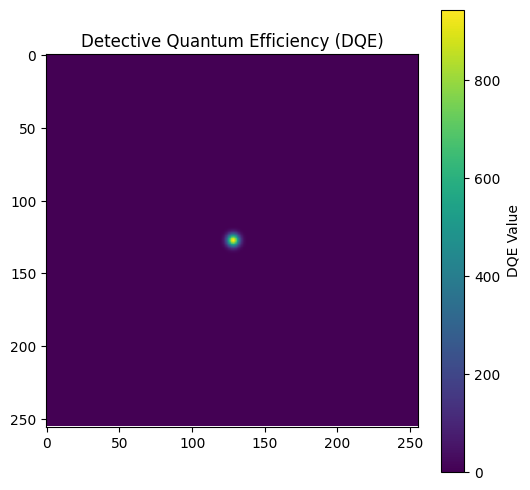

In [5]:
# Simulate noise (e.g., Poisson noise)
noise = np.random.poisson(1, size=psf.shape)

# Compute DQE as (MTF^2) * (Signal Power / Noise Power)
signal_power = np.sum(psf**2)
noise_power = np.sum(noise**2)

dqe = (mtf**2) * (signal_power / noise_power)

# Plot DQE
plt.figure(figsize=(6, 6))
plt.imshow(dqe, cmap='viridis')
plt.title('Detective Quantum Efficiency (DQE)')
plt.colorbar(label='DQE Value')
plt.show()